<a href="https://colab.research.google.com/github/swon95/ML_Cardiovascular-disease-prediction/blob/main/Cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 라이브러리 설치

In [1]:
!pip install pandas-profiling==3.1.0
!pip install category_encoders

# 데이터셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle_data/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 데이터셋 설명
Kaggle Data Set


---

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706

심혈관 질환 데이터 세트를 기반으로,

심혈관 질환에 걸릴 확률을 예측하는 모델
 - 컬럼 설명

age : 나이

gender : 성별 (1 = 여자, 2 = 남자)

height : 키(cm) - int

weight : 몸무게(kg) - float

ap_hi : 혈압(수축)

ap_lo : 혈압(이완)

cholesterol : 콜레스테롤 (1 = 정상, 2 = 정상 이상, 3 = 정상보다 좋음)

gluc : 혈당, 당뇨와 관련있는 컬럼으로 예측 (1 = 정상, 2 = 정상 이상, 3 = 정상보다 좋음)

smoke : 흡연 여부 (binary)

alco : 알코올 섭취 여부 (binary)

active : 신체의 활동 여부 (binary)

cardio : 심혈관 질환의 유무 (binary) - 타겟

## 전처리

### 불필요한 컬럼 제거(id 특성 제거)

In [15]:
# 카디널리티가 샘플 수 만큼 존재했던 id 특성은 제거
# 카디널리티가 높으면(중복도가 적으면) 모델 학습에 편향(과적합)된 학습을 초래하기 때문에
df.drop(labels = 'id', axis = 1, inplace = True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 데이터 형 변환(age 특성)

In [16]:
# 일? 로 표현된 데이터를 365로 나누어주고, 타입을 정수형으로 변환해 소숫점 제거
df['age'] = (df['age'] / 365).astype('int')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


### Feature Engineering(BMI 특성 생성)

In [17]:
# 체중과 키를 기반으로 BMI 계산공식을 대입
df["bmi"] = df["weight"] / (df["height"]/100)**2
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [18]:
# height, weight, ap_hi, ap_lo 특성의 최솟값, 최댓값이 도메인지식으로는 이상하다고 판단되어 확인 필요
# height, weight 특성이 bmi 특성에도 영향을 끼쳐 이상하게 출력된것같음
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


### 특성공학

In [70]:
# 제거대상 = 이완계혈압이 200 이상인 사람의 데이터, 이는 무의미한 데이터로 판단.
df[df['ap_lo'] >= 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
228,47,2,183,98.0,160,1100,1,2,1,0,1,1,29.263340
241,60,2,157,60.0,160,1000,2,1,0,0,0,1,24.341758
260,49,1,150,83.0,140,800,1,1,0,0,1,1,36.888889
329,64,1,176,63.0,160,1000,2,2,0,0,0,1,20.338326
345,51,1,154,81.0,140,1000,2,1,0,0,1,1,34.154158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,63,1,167,81.0,160,1000,1,1,0,0,1,1,29.043709
69872,59,1,152,56.0,160,1000,1,1,0,0,1,1,24.238227
69878,58,2,168,95.0,160,1000,1,1,0,0,1,1,33.659297
69885,61,2,166,78.0,170,1000,1,1,0,0,0,0,28.305995


In [64]:
# 제거 대상 = 수축계혈압이 300 이상인 사람의 데이터, 이는 무의미한 데이터로 판단.
df[df['ap_hi'] >= 300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
1876,41,1,160,60.0,902,60,1,1,0,0,1,0,23.437500
2014,62,2,167,59.0,906,0,1,1,0,0,1,0,21.155294
4817,39,1,168,63.0,909,60,2,1,0,0,1,0,22.321429
7763,57,1,175,80.0,11500,90,1,1,0,0,1,1,26.122449
8915,51,1,164,75.0,1420,80,2,1,0,0,1,1,27.885187
9557,62,1,155,87.0,701,110,1,1,0,0,1,1,36.212279
13895,43,1,168,72.0,1500,80,1,1,0,0,1,1,25.510204
17713,61,2,163,50.0,907,70,3,3,0,0,1,1,18.818924
23867,44,1,161,92.0,906,0,2,1,0,0,1,1,35.492458
25464,43,2,169,75.0,14020,80,2,1,0,0,1,1,26.259585


In [50]:
# 제거대상 = 성인 (데이터 기준 최소 29세) 의 키가 130 혹은 이보다 작은사람은 없을거라 판단.
df[df['height'] <= 130]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
224,59,2,76,55.0,120,80,1,1,0,0,1,0,95.221607
3420,39,1,100,70.0,100,70,1,1,0,0,1,0,70.000000
3735,48,1,120,70.0,120,70,1,1,0,0,1,0,48.611111
3752,42,1,120,30.0,110,70,1,1,0,0,1,0,20.833333
4212,44,1,120,80.0,120,80,1,1,0,0,1,0,55.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65302,50,1,99,60.0,90,60,1,1,0,0,1,0,61.218243
66023,39,1,120,80.0,120,70,2,1,0,0,1,0,55.555556
66479,46,2,110,90.0,110,90,1,1,0,0,1,0,74.380165
66643,51,1,57,61.0,130,90,1,1,0,0,1,1,187.750077


In [46]:
# 제거대상 = 성인 (데이터 기준 최소 29세) 의 몸무게가 30kg 혹은 이하인 사람은 없을거라 판단.
df[df['weight'] <= 30.0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
3752,42,1,120,30.0,110,70,1,1,0,0,1,0,20.833333
18559,49,1,160,30.0,120,80,1,1,0,0,1,1,11.718750
26806,63,1,157,23.0,110,80,1,1,0,0,1,0,9.331007
29488,55,2,177,22.0,120,80,1,1,1,1,1,0,7.022248
33817,59,2,178,11.0,130,90,1,1,0,0,1,1,3.471784
34276,40,2,128,28.0,120,80,1,1,0,0,1,0,17.089844
41905,58,1,143,30.0,103,61,2,1,0,0,1,0,14.670644
57858,51,2,165,10.0,180,1100,2,2,0,0,1,1,3.673095
60188,59,1,162,21.0,120,80,2,1,0,0,1,1,8.001829
60699,51,1,171,29.0,110,70,2,1,0,0,1,1,9.917581


In [ ]:
def 뚝딱뚝딱(df):

  select_columns = df['weight', 'height', 'ap_hi', 'ap_lo']
  #dels = select_columns.drop(df['weight'] <= 30], df['height'] <= 130, df['ap_hi'] >= 300, df['ap_lo'] >= 200)

  #df.drop(df['weight'] <= 30.0, df['height'] <= 130, df['ap_hi'] >= 300, df['ap_lo'] >= 200)
  
  return df

### 판다스 프로파일링

- 결측치는 없음
- 중복되는 데이터가 2598개로 전체 데이터의 3.7%를 차지함.

In [19]:
from pandas_profiling import ProfileReport

profile = df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

중복값의 합계가 3208 개로

학습에 유의미한 영향을 끼치지 않을거라 판단되어 제거해 줌

In [24]:
df.duplicated().sum()

3208

In [25]:
df.drop_duplicates(inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [10]:
# 각 컬럼별 고윳값(샘플의 종류) 확인
df.nunique()

age              28
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
bmi            3808
dtype: int64

# 시각화

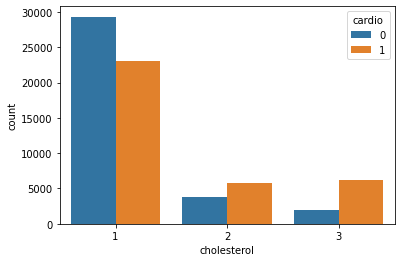

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.countplot(x='cholesterol',hue='cardio',data=df)

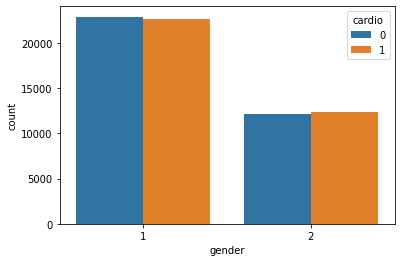

In [22]:
sns.countplot(x='gender',hue='cardio',data=df)

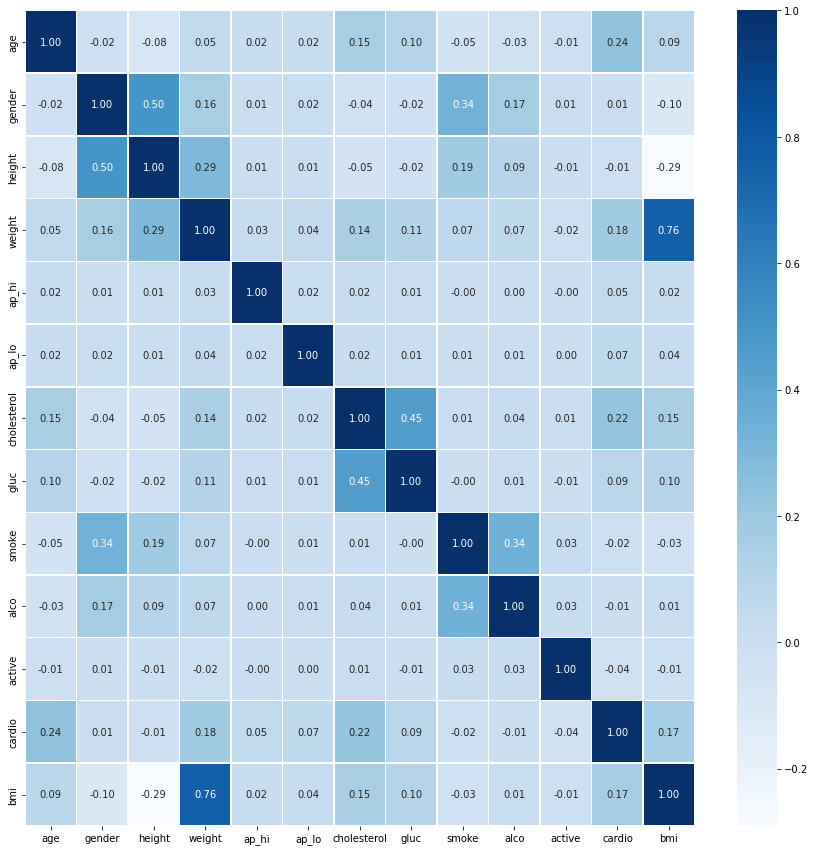

In [11]:
# 상관관계 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 기준모델 정의

In [12]:
# 분류 문제에 대한 기준모델
from sklearn.metrics import accuracy_score

target = df['cardio']

major = target.mode()[0]
predict = [major] * len(target)

accuracy_score = accuracy_score(target, predict)
print('기준모델 정확도 :', accuracy_score)

기준모델 정확도 : 0.5003


Confusion matrix 를 이용해 분류모델 평가